# Introduction

* MNIST database of hand written digits (http://yann.lecun.com/exdb/mnist/)

*  Create a convolutional neural network (CNN or convonet)(wikipedidia discussion on convolutional neural networks)
    (https://en.wikipedia.org/wiki/Convolutional_neural_network)

* Common in computer-vision applications
    * Recignizing hand written digits and images
    * self-driving cars
    * Recognizing objects in images and videos
    
* Non-vision applications
    * Natural-language processing
    * Recommender systems
"""


# The dataset

* 60,000 labelled `(supervised)` digid image samples for training and 10000 for testing

* The data is a 28 by 28 pixel image (784 features), represented as Numpy Arrays

* Grayscale pixel intensity (shade) -- 0-255

* In Convent we use the probabilistic classification
    + Model will output 10 probabilities this is the likelihood 0-9
    + Highest probability is the predicted value
    

# Keras and Deep learning

* Reproducability is difficult since the libraries tend to parallelize the floating point calculations

* Each time the calculations execute the execution is in different order.

* Produce different results in each execution


# Building the network (Model)

* Sequence of layers containing the neurons used to learn from the samples

* Each layer receieves inputs, process it, (activation function) and produce the results

* The more the layers you stack, the deeper the network -- deep learning

* Loss function -> produces a measure of how well the network predicts the target values.
  The lower the value of the loss the better the predictions

* Optimizer minimize the values produced by the loss function to tune the network to make better predictions

# Loading the MNIST Dataset 

In [1]:
from tensorflow.keras.datasets import mnist
# from sklearn.dataset import fetch_mldata

C:\Users\Wamaitha\anaconda3\envs\tf_env\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Wamaitha\anaconda3\envs\tf_env\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Wamaitha\anaconda3\envs\tf_env\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Wamaitha\anaconda3\envs\tf_env\lib\site-packages\ten

In [2]:
# load the data as training and testing
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# # checking the dimensions of the data
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
y_test.shape

(10000,)

# Visualizing the digits

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

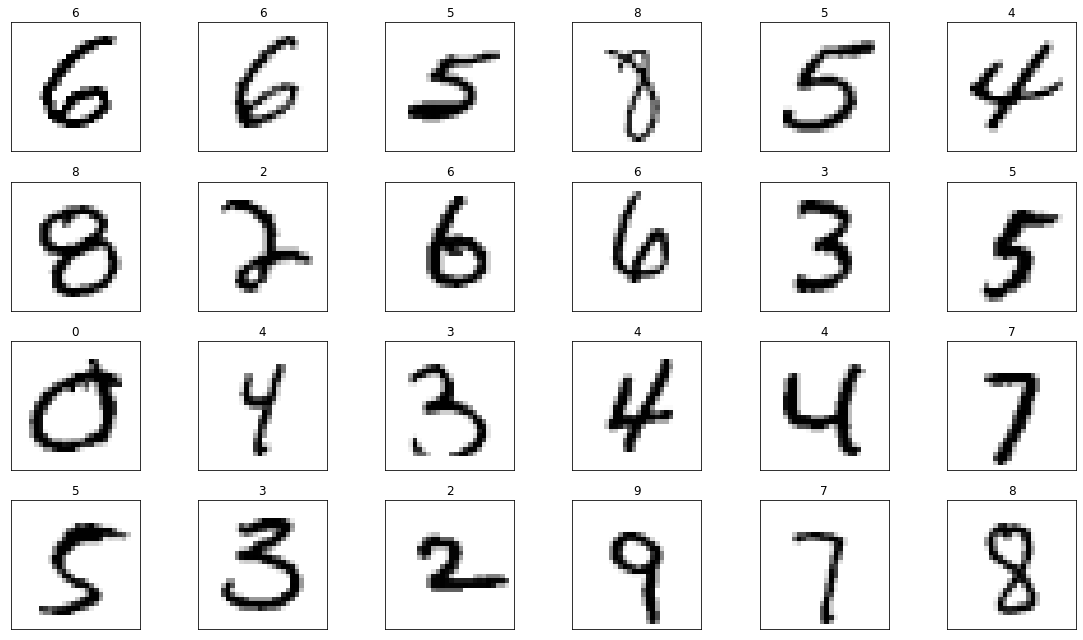

In [7]:
index = np.random.choice(np.arange(len(x_train)), 24, replace = False)
figure,axes = plt.subplots(nrows = 4, ncols = 6, figsize = (16,9))

for item in zip(axes.ravel(), x_train[index], y_train[index]):
    axes, image,target = item
    axes.imshow(image, cmap = plt.cm.gray_r)
    axes.set_xticks([]) # removes the x-ticks marks
    axes.set_yticks([]) # remove the y-ticks marks
    axes.set_title(target)

plt.tight_layout()

# Data preparation

* Scikit-learn the dataset are bundled and are preprocessed in shape for 
    the models to be used in
    
* kereas convonet the dataset mnist will need to be prepared.

* The data needs to be reshaped.

* Each sample must have the shape

* (width, height, channel) -- Each pixel has one channel for the grayscale 
    0-255 the sample shades are (28, 28, 1)
    
* As the NN learns from the images, it creates more channels 
    + The channel will represent more complex features i.e. edges, curves and 
        lines
    + Enable the network to recognize digits based on the features and how they are combined

# Reshaping the data

In [8]:
x_train = x_train.reshape((60000, 28, 28, 1))

In [9]:
x_train.shape

(60000, 28, 28, 1)

In [10]:
x_test = x_test.reshape((10000, 28, 28, 1))

In [11]:
x_test.shape

(10000, 28, 28, 1)

# Normalizing the image data

Numeric features values -> could vary widely
28*28 = 784 == Deep learning perform better on data that is normalized
* 0.0 - 1.0
* A range for which the data mean is 0.0 and SD is 1.0
=> Divide each pixel value of 255 to normalize to 0.0 - 1.0
RGB (0 - 255): 0, 0, 255

In [12]:
x_train = x_train.astype('float32')/255

In [13]:
x_test = x_test.astype('float32')/255

# one-Hot Encoding: Convert labels into categorical data

Prediction for each digit will be an array of 10 probabilities. e.g. 0.8, 0.0, 0.1, 0, ....(10). 
To evaluate the model accuracy, Keras compares predictions to datasets labels
* Both must have the same shape
* The MNIST labels are individual integers 0 - 9
We must transform labels into categorical data arrays that matches the prediction format.
We use one-hot encoding to convert labels from integers into 10 element arrays of 1.0s and 0.0s
Only one element is a 1.0 and the rest are 0.0s (0, 1, 2, ...9):
(0, 0.05, 0.5, 0.8, 0.000) >> 0(1) 1(0) 2(0) ... 9(0) tensorflow.keras.utils function to_categorical --
one-hot encoding apples,, lemons,, oranges,,, 1 0

# One-Hot encoding

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
y_train = to_categorical(y_train)

In [16]:
y_train.shape

(60000, 10)

In [17]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [18]:
len(y_train[0])

10

In [19]:
y_test = to_categorical(y_test)

In [20]:
y_test.shape

(10000, 10)

# Creation of a Convolutional Neural Network

* Configure a CNN
* Sequential Model -- Stacks layers to execute sequentially
    - Output of one layer  becomes the input to the next
    - Feed forward network
    - (Not all layers will feed the next layer)

In [21]:
from tensorflow.keras.models import Sequential as sq

In [22]:
cnn = sq()

In [23]:
cnn

# Adding layers to the network

* A typical convonet has:
   - An input layer -- receives the training samples
   - HIdden layers -- that learn  from the training samples
   - Output layer -- produces the predictions


In [24]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

# First convolution

We start with the convolution layer
It uses the relationship between pixels in close proximity, to run learn some
*useful features* (patterns) in small areas of each sample
These features become input to the subsequent layers

The next convolution layer moves kernel (3*3 matrix) to the right(sride)
which then overlaps witht he previous kernel, so the convolution layer can learn
from all features that touch one another. 
Complete pass left to right and top to bottom is called a **filter**.

For a 3 by 3 kernel, the filter dimensions will be 2 less the input i.e.
(6*6) -> (4*4) For the test data (28*28) === 26*26. The number of filters commonly used in the 
convolution layer is commonly 32 or 64, and each filter generates different results.

Higher resolution images ---> more freatures and that means you require more filters.
**The set of filters produced by a convolutional layer is called a feature map**.
Subsequent convolutional layers combine features from previous feature maps to recognize large 
features. e.g. In facial recognition, the early layers might recognize lines, edges, curves and 
the subsequent layers might combine those features to get things like eyes, eyeballs, nose, ears
and mouth.

``After learning a feature, it can recognize that feature anywhere in the image`` -->  Convents
are popular for object recognition in images


In [25]:
#Adding coonv2D which implements a convolutional layer (layer 1)
cnn.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [26]:
cnn

* filters = 64: number of filters in the resulting feature map
* kernel_size = (3, 3) == The size of the kernel used in each filter
* activation = 'relu' == Rectifird Linear Unit activation function.

s = activation(input*weights + bias) sinh = f(6) linear s=1

Add a conv layer -- First layer shape (28, 28, 1) creates an input layer to load the samples and pass them to the Conv2D layer which is the first hidden layer. Subsequent layers infers input_shape from the previous layer's output -- **stacked
layers**

``Dimensionality of the first convolution layer's output`` -- since specified a 64 filters and a 3*3 kernel so the feature map is 26 * 26 * 64 features total 43264 -- significant increase in dimensionality -- this is what happens --- each layer adds features and this adds map dimentionality which grows significantly. Reason why deep learning requires high processing power.

**Over fitting** -- This can occur when a model is too complex compared to what it is modelling. In extreme cases the model could even memorize its training data. In deep learning over fitting occurs if the dimensionality becomes too large. --> Computation time. CPU -- slow GPU -- > 
One way of preventing overfitting --> **pooling** --> adding a pooling layer to reduce the computation time (also reducing overfitting) a convolution layer is often followed by one or more layers that reduces dimentionality of the convolutional layer's output.

Pooling compressed (down samples) the data,,, results in discarding some features. This reduces computation required, and creates a more ***general model***
e.g. 44.1khz -- 44100 samples per second ... 
training(lower***) /// testing data( higher***)

The most used pooling technique -- max pooling... keeps the maximum. -- 
Adding a pooling layer -- outputs maximum feature from each pool
Pools do not overlap..
Stride for a 2 by 2 pool is 2
each group of 4 features wil be reduced to one (2*2) pooling will compress
the features by 75%

26*26*64 == 13*13*64

In [27]:
28*28

784

In [28]:
26*26*64

43264

In [29]:
#pooling layer
cnn.add(MaxPooling2D(pool_size=(2,2)))

In [30]:
cnn

***Adding another convolutional layer and pooling layer -- convents have
many convolutional and pooling layers...***

In [31]:
#Convo layer 2
cnn.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))

In [32]:
#pooling layer 2
cnn.add(MaxPooling2D(pool_size=(2,2)))

In [33]:
cnn

***The input to the second convo is 13*13*64(because of pooling) output from the first pooling layer.***

***Output of this Conv2D layer will be 11*11*128***
***For odd dimensions, the keras pooling layer rounds down uneven numbers i.e. (11*11*128)***
in this case 10*10 -- (5*5 by 128)
***Increase filters when you pool coz <filter and <features not good***


# Flattening the results
The model's output will be a one dimensional (1d) array of 10 probabilities that classify the digits.
To prepare for a 1D final prediction, we need to flatten the previous layers to one dimension
Flattens layer's output will be 1 by 3200 (5*5*128) == 3200

In [34]:
#Flattening the results
cnn.add(Flatten())

In [35]:
cnn

* First layers, (before flatten) learned digit features.
* We then must learn the relationship between those features. ->
    to classify which digit each image represents.
* We use te fully connected Dense layers to achieve this
* We create a dense layer (128 neurons- units) that learns from 
    3200 outputs

In [36]:
cnn.add(Dense(units=128, activation='relu'))

Convonents contain at least one dense layer. For more complex image
dataset (higher resolution images) - This requires more dense layers: commonly used is 4096 neurons


We add another dense layer so as to produce the final output. The final dense layer classifies output into neurons
(0-9). We use the softmax activation function. It converts the 10 neurons into classification probabilities.
The neuron with the highest probabilities will represent the prediction of the given input digit.

In [37]:
cnn.add(Dense(units=10, activation='softmax'))

# Printing the model

* We use the summary method.

In [38]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               409728    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

Outputs:
* Note that the output shapes and the numbers of parameters
* The number of parameters are the weights
* The network is relatively small. But has to learn over 500, 000 (28*28*64) -
    the images are not so big. Assume 4k video frames, super high resolution images -- digital cameras
* The output shape column: None means that the model does not know in advance how many training samples you
    are going to provide.

# Visualizing the model structure

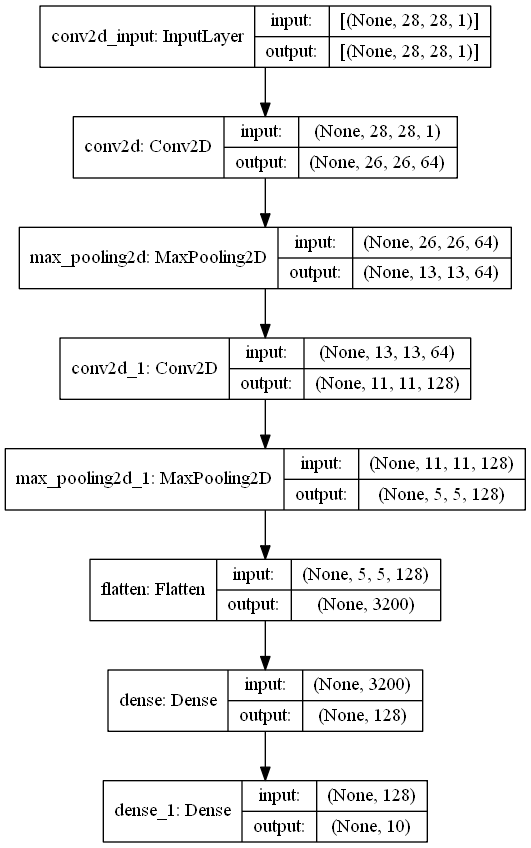

In [39]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convonet.png', show_shapes=True, show_layer_names=True)
Image(filename='convonet.png')# display the image

# Training and evaluation

In [40]:
#compiling the model
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

* Adam (performs well in most models) -- This adjusts the weights in the neural networl as it learns
* Loss functions used by the optimizer in multi - classification network

In [41]:
#fit method is used
cnn.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 105s 2ms/sample - loss: 0.1409 - acc: 0.9564 - val_loss: 0.0496 - val_acc: 0.9860
Epoch 2/5
54000/54000 [==============================] - 134s 2ms/sample - loss: 0.0440 - acc: 0.9867 - val_loss: 0.0378 - val_acc: 0.9887
Epoch 3/5
54000/54000 [==============================] - 146s 3ms/sample - loss: 0.0308 - acc: 0.9905 - val_loss: 0.0326 - val_acc: 0.9915
Epoch 4/5
54000/54000 [==============================] - 209s 4ms/sample - loss: 0.0219 - acc: 0.9927 - val_loss: 0.0415 - val_acc: 0.9882
Epoch 5/5
54000/54000 [==============================] - 168s 3ms/sample - loss: 0.0157 - acc: 0.9949 - val_loss: 0.0296 - val_acc: 0.9928


* epochs - training the neural network  iteratively over time -- epoch -- process every training dataset sample once.
* Hyper parameter -- tuning
* Batch size - number of samples to process at a tune -2 from 32, 512
* validation_split -- 0.1 - each epoch model -- uses validation samples to make predictions. Displays the loss and accuracy -- tune your layers and fit method;s hyperparameter -- layers compositions of the model
* Can specify validation data with argument, validation_data

In [42]:
print(sum([89,89,77,86,75])/5)

83.2


In [43]:
(83.2*5)/60

6.933333333333334

In [44]:
#evaluating the model on unseen data using the evaluate method
loss, accuracy = cnn.evaluate(x_test, y_test)

10000/10000 [==============================] - 15s 1ms/sample - loss: 0.0249 - acc: 0.9927


In [45]:
loss

0.02486318659093813

In [46]:
accuracy

0.9927

# Making predictions with the model's predict method

In [47]:
prediction = cnn.predict(x_test)

In [48]:
y_test[0] #First digit is a 7

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [49]:
for index, probability in enumerate(prediction[0]):
    print(f'{index} : {probability:.10%}')

0 : 0.0000000961%
1 : 0.0000000441%
2 : 0.0000060721%
3 : 0.0000029021%
4 : 0.0000000001%
5 : 0.0000000227%
6 : 0.0000000000%
7 : 99.9999880791%
8 : 0.0000000067%
9 : 0.0000041563%


* Our model believes this digit is a 7: nearly 100% certain
* Not all predictions are as accurate or have this certainty

# Locating the incorrect predictions

* We want to view incorrectly predicted images => so as to get a sense of 
    digits that the model has trouble getting right.
* If the model is mispredicting 3s then we need more 3s
* To determine whether a prediction was correct, we compare the index with the largest probablility
    in the predictions [0] --> the one that contains the "1".
    ** IF the indices are the same then the prediction is correct *"
    
* Reshape the sample from the shape(28, 28, 1) that keras needed back to (28, 28) this is
    what matplotlip needs for displaying images


In [50]:
images = x_test.reshape((10000, 28, 28))

In [51]:
incorrect_predictions = []#list

In [52]:
for i, (p, e) in enumerate(zip(prediction, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)
    if predicted != expected: #prediction was incorrect
        incorrect_predictions.append((i, images[i], predicted, expected))

p -- predicted value array and e is the expected
argmax -- determines the index of an array with the highest valued element

In [53]:
len(incorrect_predictions)

73

* Display 24 of the incorrect images. Labelled with each images index, 
    predicted value and the expected value. Before reading the expected values,
    look at each digit and write down what digit you think it is.
** Helps getting know your data**


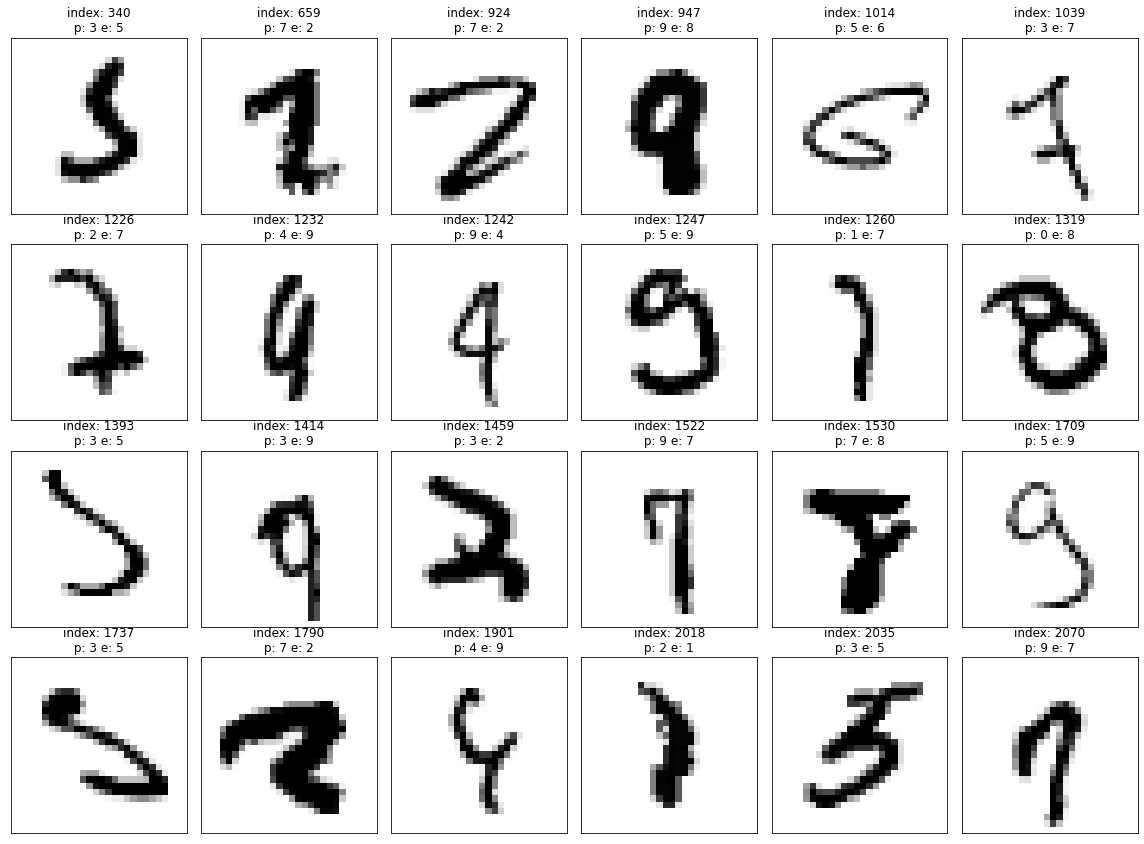

In [54]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([]) # remove the x axis ticks marks
    axes.set_yticks([]) # remove the y axis ticks marks
    axes.set_title(f'index: {index}\n p: {predicted} e: {expected} ')
    plt.tight_layout()

# Displaying the probabilities for the several incorrect predictions

In [55]:
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability: 10%}')

In [56]:
display_probabilities(prediction[1530])

0:  0.000005%
1:  0.000466%
2:  0.000129%
3:  0.105477%
4:  0.000143%
5:  0.000073%
6:  0.000000%
7:  67.544007%
8:  32.340321%
9:  0.009372%


In [57]:
display_probabilities(prediction[582])

0:  0.000020%
1:  0.000982%
2:  0.897686%
3:  0.334617%
4:  0.000001%
5:  0.000005%
6:  0.000010%
7:  0.000064%
8:  98.766601%
9:  0.000016%


# Saving and loading the model

* Saving model state
    - Making more predictions
    - Training more 
    - Train for nre problems
    - Transfer learning -- to a new model 

In [58]:
cnn.save('mnist_cnn.h5') #Stores the model architecture and state and 
                        # in a hierarchical format

In [59]:
# loading a saved model
from tensorflow.keras.models import load_model


In [60]:
cnn = load_model('mnist_cnn.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [62]:
tensorboard --logdir logs/scalars


SyntaxError: invalid syntax (<ipython-input-62-799350860dd5>, line 1)